In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from fredapi import Fred
import yfinance as yf

In [268]:
# API and data retrieval
api_key = "f81527f0957c7f817b9b2521aab8913d"
fred = Fred(api_key=api_key)
series_id = "IR3TIB01AUM156N"
data = fred.get_series(series_id)

In [285]:
SP500 = yf.Ticker("^GSPC")
SP500_data = SP500.history(period="max")
SP500_data = SP500_data["Close"]

In [279]:
SP500

2014-12-31    2058.90
2015-01-01        NaN
2015-01-02    2058.20
2015-01-05    2020.58
2015-01-06    2002.61
               ...   
2024-12-24    6040.04
2024-12-25        NaN
2024-12-26    6037.59
2024-12-27    5970.84
2024-12-30    5906.94
Length: 2609, dtype: float64

In [293]:
SP500_new = SP500_data[10000:24366]

Mean Squared Error: 9.417853702322


Text(0.5, 1.0, 'US 3-Month Treasury Bill Rate vs. S&P 500')

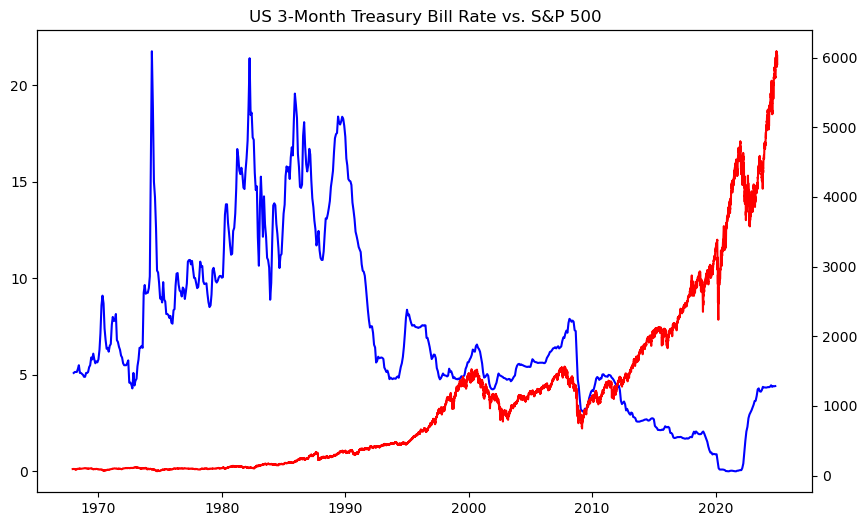

In [295]:
# Prepare data
X = data.index.values.reshape(-1, 1)  # Convert date indices to feature values
y = data.values  # The actual data (target variable)

# Convert dates to numerical values (e.g., number of days since start)
X_numeric = np.array([(x - X.min()).days for x in data.index]).reshape(-1, 1)

# Transform features to polynomial features (e.g., quadratic, cubic)
poly = PolynomialFeatures(degree=7)  # You can experiment with degrees like 2, 3, or higher
X_poly = poly.fit_transform(X_numeric)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predictions
y_pred = model.predict(X_poly)


# Model performance
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

# Secondary axis
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(X, y, color='blue', label='Actual Data')
ax2 = ax1.twinx()
ax2.plot(SP500_new.index, SP500_new, color='red', label='S&P 500')
plt.title("US 3-Month Treasury Bill Rate vs. S&P 500")
